<a href="https://colab.research.google.com/github/Isanghada/_FINAL_PROJECT-CODE-/blob/main/vggnet_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip -qq "/content/drive/MyDrive/Final_pro/김준형/음식점_음식사진.zip" -d "./dataset"

In [14]:
!unzip -qq "/content/drive/MyDrive/Final_pro/김남규/_관광명소 이미지.zip" -d "./dataset2"

In [4]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from pathlib import Path
from PIL import Image
class FeatureExtractor:
    def __init__(self):
        # Use VGG-16 as the architecture and ImageNet for the weight
        base_model = VGG16(weights='imagenet')
        # Customize the model to return features from fully-connected layer
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)
    def extract(self, img):
            # Resize the image
            img = img.resize((224, 224))
            # Convert the image color space
            img = img.convert('RGB')
            # Reformat the image
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)
            x = preprocess_input(x)
            # Extract Features
            feature = self.model.predict(x)[0]
            return feature / np.linalg.norm(feature)

fe = FeatureExtractor()

# Iterate through images (Change the path based on your image location)
# for img_path in sorted("/content/dataset"):
#     print(img_path)
#     # Extract Features
#     feature = fe.extract(img=Image.open(img_path))
#     # Save the Numpy array (.npy) on designated path
#     feature_path = "/content/dataset/test.npy"
#     np.save(feature_path, feature)

553476096/553467096 [==============================] - 3s 0us/step


In [19]:
import os

path = '/content/dataset2/관광명소'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.jpg')]
file_list_py

In [20]:
import matplotlib.pyplot as plt
import numpy as np

features = []
img_paths = []

# Save Image Feature Vector with Database Images
for i in file_list_py:
  try:
    image_path = "/content/dataset2/관광명소/" + i
    img_paths.append(image_path)

    # Extract Features
    feature = fe.extract(img=Image.open(image_path))

    features.append(feature)

    # Save the Numpy array (.npy) on designated path
    feature_path = "/content/dataset2/관광명소/" + i + ".npy"
    np.save(feature_path, feature)

  except Exception as e:
    print('예외가 발생했습니다.', e)

In [13]:
ids

array([ 955,  943,  135,  263, 1330])

In [30]:
scores[0][1].split("/")[4]

'24_곽지해수욕장.jpg'

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44285 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54644 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50837 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_

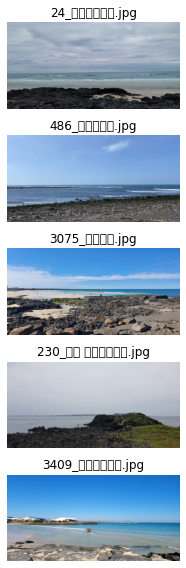

In [35]:
# Insert the image query
img = Image.open("/content/dataset2/관광명소/24_곽지해수욕장.jpg")
# Extract its features
query = fe.extract(img)

# Calculate the similarity (distance) between images
dists = np.linalg.norm(features - query, axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:5]

scores = [(dists[id], img_paths[id], id) for id in ids]
# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5):
    score = scores[a]
    axes.append(fig.add_subplot(5,1, a+1))
    subplot_title=str(round(score[0],2)) + "/m" + str(score[2]+1)
    axes[-1].set_title(subplot_title)
    plt.title(f"{scores[a][1].split('/')[4]}")
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()